In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

##### NOTES
**Data_type** : change (start_time ,end_time ) to datetime


In [5]:
df_clean=df.copy()

In [6]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])
df_clean['year'] = df_clean['start_time'].dt.year
df_clean['month'] = df_clean['start_time'].dt.month
df_clean['month_name'] = df_clean['start_time'].dt.month_name()
df_clean['day'] = df_clean['start_time'].dt.day
df_clean['day_name'] =df_clean['start_time'].dt.day_name()

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [8]:
df_clean.describe().T

,count,mean,min,25%,50%,75%,max,std
duration_sec,183412.0,726.078435,61.0,325.0,514.0,796.0,85444.0,1794.38978
start_time,183412,2019-02-15 21:07:59.090985728,2019-02-01 00:00:20.636000,2019-02-08 08:31:50.814249984,2019-02-15 23:05:02.337500160,2019-02-22 11:01:16.969750016,2019-02-28 23:59:18.548000,NaN
end_time,183412,2019-02-15 21:20:05.668533504,2019-02-01 00:04:52.058000,2019-02-08 08:42:17.385500160,2019-02-15 23:17:22.168000,2019-02-22 11:14:24.885750016,2019-03-01 08:01:55.975000,NaN
start_station_id,183215.0,138.590427,3.0,47.0,104.0,239.0,398.0,111.778864
start_station_latitude,183412.0,37.771223,37.317298,37.770083,37.78076,37.79728,37.880222,0.099581
start_station_longitude,183412.0,-122.352664,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119,0.117097
end_station_id,183215.0,136.249123,3.0,44.0,100.0,235.0,398.0,111.515131
end_station_latitude,183412.0,37.771427,37.317298,37.770407,37.78101,37.79732,37.880222,0.09949
end_station_longitude,183412.0,-122.35225,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119,0.116673
bike_id,183412.0,4472.906375,11.0,3777.0,4958.0,5502.0,6645.0,1664.383394


In [9]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,month,month_name,day,day_name
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,2019,2,February,28,Thursday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,2019,2,February,28,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,2019,2,February,28,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,2019,2,February,28,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,2019,2,February,28,Thursday


## Univariate Exploration

#### Question 1: How many trips are made on a daily basis?

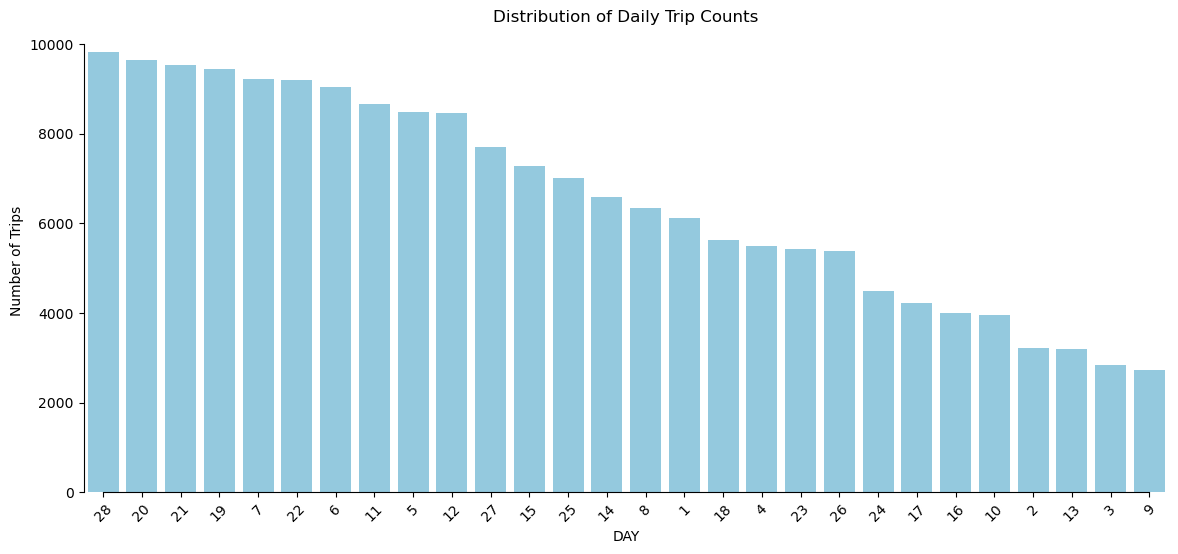

In [12]:
daily_trip_count = df_clean.groupby(['day','day_name'])['start_station_id'].count().sort_values(ascending=0).reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(data=daily_trip_count ,x='day',y='start_station_id',order=daily_trip_count['day'],color='skyblue')
plt.xlabel('DAY')
plt.ylabel('Number of Trips')
plt.title('Distribution of Daily Trip Counts')
plt.xticks(rotation=45) 
sns.despine(trim=True)  


#### Question 3: How are trips distributed by gender?

In [14]:
count_trip_gender =df_clean.groupby('member_gender')['start_station_id'].count().sort_values(ascending=0).reset_index()
count_trip_gender

,member_gender,start_station_id
0,Male,130500
1,Female,40805
2,Other,3647


Text(0.5, 1.0, 'Distribution of Gender Trip Counts')

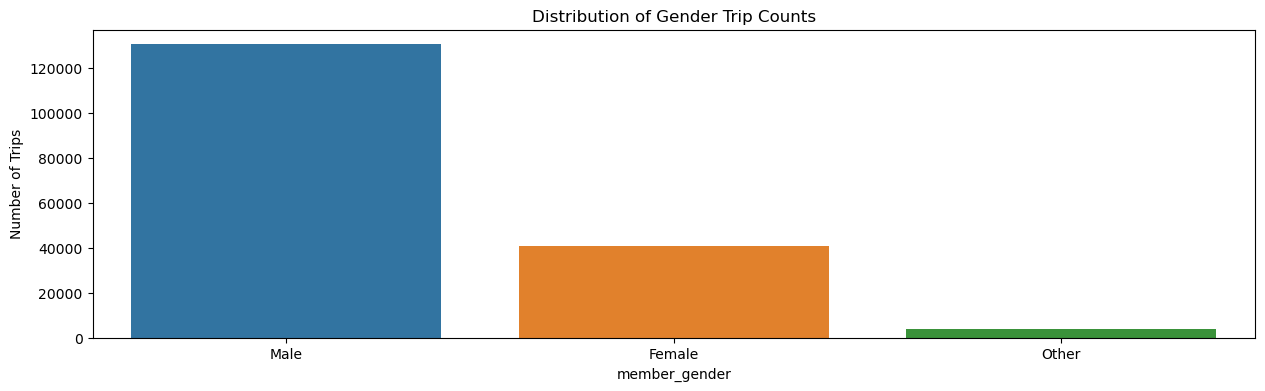

In [33]:
plt.figure(figsize=(15, 4))
sns.barplot(data=count_trip_gender, x='member_gender', y='start_station_id',hue='member_gender')
plt.xlabel ='Gender'
plt.ylabel('Number of Trips')
plt.title('Distribution of Gender Trip Counts')

C:\Users\AhmedRostom\AppData\Local\Temp\ipykernel_30468\1443373758.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts, palette='viridis')


TypeError: 'str' object is not callable

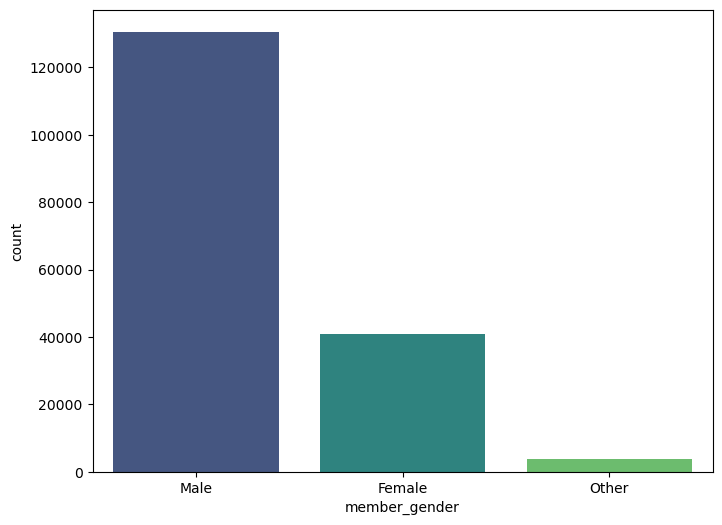

In [39]:
user_type_counts = df_clean['user_type'].value_counts().reset_index()
user_type_counts

,user_type,count
0,Subscriber,163544
1,Customer,19868


Text(0.5, 1.0, 'Distribution of user type Counts')

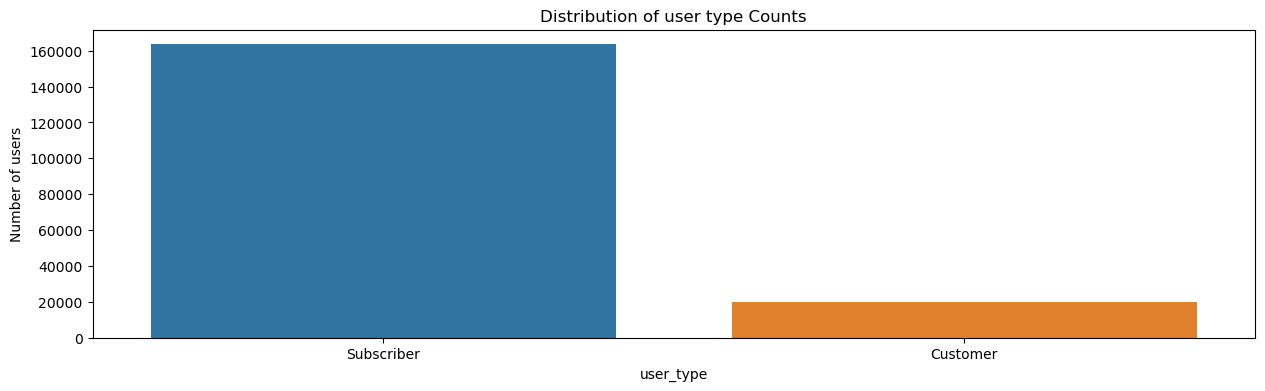

In [45]:
plt.figure(figsize=(15, 4))
sns.barplot(data=user_type_counts, x='user_type', y='count',hue='user_type')
plt.ylabel('Number of users')
plt.title('Distribution of user type Counts')

Number of Unique Start Stations: 329
